In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 6,4

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel

from mlxtend.feature_selection import SequentialFeatureSelector

import warnings
warnings.filterwarnings('ignore')

In [6]:
diabetes = pd.read_csv('diabetes.csv')
train = pd.read_csv('diabetes.csv')

In [7]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
train.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Exploratory data analysis

In [10]:
# Checking whether the dataset is imbalanaced or not.

train['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

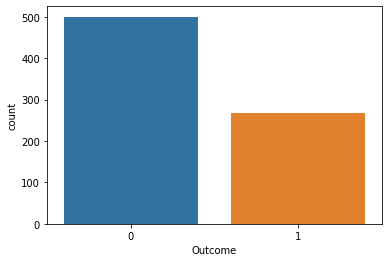

In [11]:
sns.countplot(x = train['Outcome'], data= train);

In [12]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From the above we can see that the minimum value of Glucose, BloodPressure, SkinThickness, Insulin & BMI is 0 which doesn't make any sense as it is not possible so we must replace these values with some other value.

### Replacing for features "Glucose", "BloodPressure", "SkinThickness", "Insulin" & "BMI"

In [13]:
train['Glucose'] = train['Glucose'].replace(to_replace=0.0, value = train['Glucose'].mean())
train['SkinThickness'] = train['SkinThickness'].replace(to_replace=0.0, value = train['SkinThickness'].mean())
train['BloodPressure'] = train['BloodPressure'].replace(to_replace=0.0, value = train['BloodPressure'].mean())
train['Insulin'] = train['Insulin'].replace(to_replace=0.0, value = train['Insulin'].mean())
train['BMI'] = train['BMI'].replace(to_replace=0.0, value = train['BMI'].mean())

## Now Plotting the quantitative columns to see their distribution.

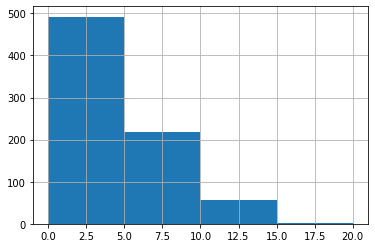

In [14]:
train['Pregnancies'].hist(bins = [0,5,10,15,20]);

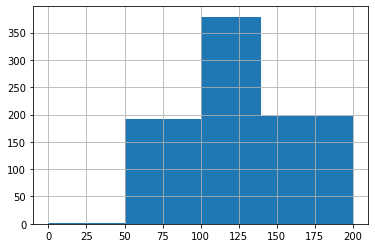

In [15]:
train['Glucose'].hist(bins = [0,50,100,140,200]);

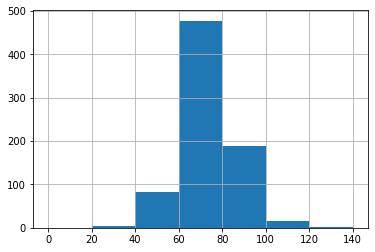

In [16]:
train['BloodPressure'].hist(bins = [0,20,40,60,80,100,120,140]);

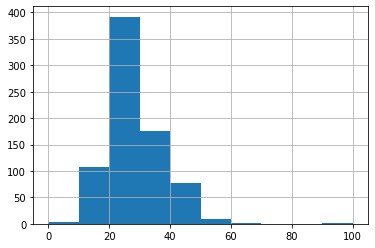

In [17]:
train['SkinThickness'].hist(bins = [0,10,20,30,40,50,60,70,80,90,100]);

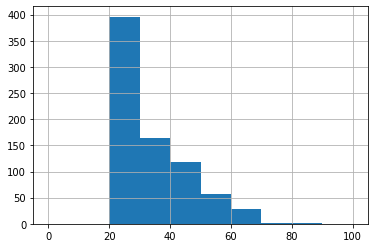

In [18]:
train['Age'].hist(bins = [0,20,30,40,50,60,70,80,90,100]);

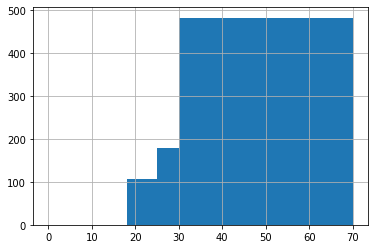

In [19]:
train['BMI'].hist(bins = [0,18,25,30,70]);

## Some more analysis

### 1 : "Glucose"

### Checking that how many womens have normal glucose concentration level i.e., <140 after 2 hours

In [20]:
train[train['Glucose']<140].count()/train.shape[0]

Pregnancies                 0.74349
Glucose                     0.74349
BloodPressure               0.74349
SkinThickness               0.74349
Insulin                     0.74349
BMI                         0.74349
DiabetesPedigreeFunction    0.74349
Age                         0.74349
Outcome                     0.74349
dtype: float64

### From above we can see that 74.39% (nearly 75%) women have normal glucose level after 2 hours

### Now checking that how many womens have higher glucose concentration level i.e., >140 after 2 hours

In [21]:
train[train['Glucose']>140].count()/train.shape[0]

Pregnancies                 0.25
Glucose                     0.25
BloodPressure               0.25
SkinThickness               0.25
Insulin                     0.25
BMI                         0.25
DiabetesPedigreeFunction    0.25
Age                         0.25
Outcome                     0.25
dtype: float64

### From above we can see that 25% women have higher glucose level after 2 hours i.e., they can have pre-diabetes.

### 2 : "BloodPressure"

### Checking that how many womens have low blood pressure (<90 mmHg diastolic blood pressure)

In [22]:
train[train['BloodPressure']<90.0].count()/train.shape[0]

Pregnancies                 0.921875
Glucose                     0.921875
BloodPressure               0.921875
SkinThickness               0.921875
Insulin                     0.921875
BMI                         0.921875
DiabetesPedigreeFunction    0.921875
Age                         0.921875
Outcome                     0.921875
dtype: float64

### From above we can see that 92.18% womens have low blood pressure

### Now checking that how many womens have high blood pressure (>90 mmHg diastolic blood pressure)

In [23]:
train[train['BloodPressure']>90.00].count()/train.shape[0]

Pregnancies                 0.049479
Glucose                     0.049479
BloodPressure               0.049479
SkinThickness               0.049479
Insulin                     0.049479
BMI                         0.049479
DiabetesPedigreeFunction    0.049479
Age                         0.049479
Outcome                     0.049479
dtype: float64

### Hence around 5% women have high blood pressure

### 3 : BMI

### Checking that how many womens are underweight (BMI < 18.5)

In [24]:
train[train['BMI']<18.5].count()/train.shape[0]

Pregnancies                 0.005208
Glucose                     0.005208
BloodPressure               0.005208
SkinThickness               0.005208
Insulin                     0.005208
BMI                         0.005208
DiabetesPedigreeFunction    0.005208
Age                         0.005208
Outcome                     0.005208
dtype: float64

### Hence around 0.5% womens are underweight.

### Checking that how many womens are normal or with healthy weight (18.5 < BMI < 24.5) 

In [25]:
train[(train['BMI']>18.5) & (train['BMI']<24.5)].count()/train.shape[0]

Pregnancies                 0.114583
Glucose                     0.114583
BloodPressure               0.114583
SkinThickness               0.114583
Insulin                     0.114583
BMI                         0.114583
DiabetesPedigreeFunction    0.114583
Age                         0.114583
Outcome                     0.114583
dtype: float64

### Hence 11.45% women are with normal or healthy weight.

### Now checking that how many womens are overweight/obese (BMI > 25.0) (as higher weights increases the chance of developing diabetes)

In [26]:
train[train['BMI']>25.0].count()/train.shape[0]

Pregnancies                 0.854167
Glucose                     0.854167
BloodPressure               0.854167
SkinThickness               0.854167
Insulin                     0.854167
BMI                         0.854167
DiabetesPedigreeFunction    0.854167
Age                         0.854167
Outcome                     0.854167
dtype: float64

### Hence 85.41 % womens are overweight/obese (at higher risk of developing diabetes)

In [27]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### Correlation of the features with target variable

In [28]:
corr_mat = train.corr()

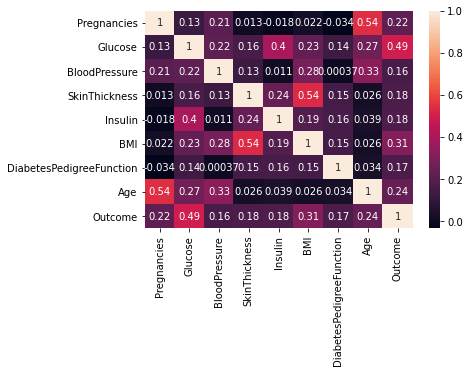

In [29]:
sns.heatmap(corr_mat, annot=True);

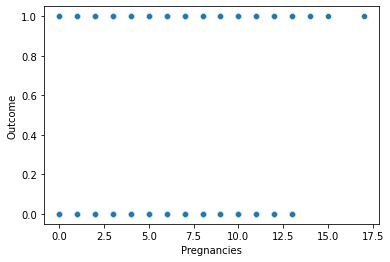

In [30]:
sns.scatterplot(x=train['Pregnancies'], y=train['Outcome']);

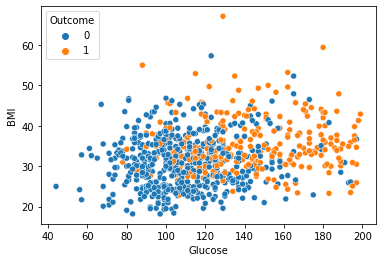

In [31]:
sns.scatterplot(x=train['Glucose'], y=train['BMI'], hue = train['Outcome']);

In [32]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [33]:
y = train['Outcome'].values

In [34]:
train.drop('Outcome', axis=1, inplace=True)

In [35]:
train.shape

(768, 8)

# Feature selection

In [36]:
selector = SelectFromModel(LogisticRegression()).fit(train,y)

In [37]:
selector.get_support()

array([False, False, False, False, False, False,  True, False])

In [38]:
selector.estimator_.coef_

array([[ 1.43734360e-01,  3.52762409e-02, -2.95878151e-02,
        -1.71965864e-02, -1.50627915e-03,  9.78279631e-02,
         1.87302646e+00,  1.10898470e-03]])

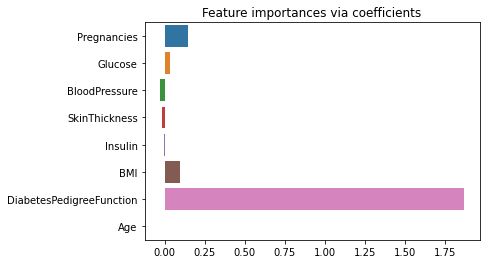

In [39]:
sns.barplot(y = train.columns, x=selector.estimator_.coef_.flatten(), orient="h");
plt.title("Feature importances via coefficients")
plt.show()

### Dropping the un-imp features based on the diagram above

In [40]:
train.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'Age'], axis = 1, inplace=True)

In [41]:
train.shape

(768, 4)

# Data Preprocessing

In [42]:
# Spliiting the dataset for modelling
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state = 42)

In [43]:
# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Creating polynomial features

In [44]:
# Creating polynomial features
poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

In [45]:
x_train_poly.shape, x_test_poly.shape

((614, 15), (154, 15))

# Modelling

In [46]:
# creating a model
model =  LogisticRegression(C=1, multi_class='ovr',
    penalty='l2',
    solver='newton-cg',
    random_state=42)

In [47]:
# Fitting the model
model.fit(x_train_poly, y_train)

LogisticRegression(C=1, multi_class='ovr', random_state=42, solver='newton-cg')

In [48]:
f_pred = model.predict(x_test_poly)

In [49]:
f_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [50]:
accuracy_score(y_test, f_pred)

0.7662337662337663

# Hyperparameter tuning

In [51]:
c_values = np.logspace(-2, 3, 500)
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=17)
param_grid = [
    {
        'C': c_values,
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'random_state': [42]
    },
    {
        'C': c_values,
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class': ['ovr'],
        'random_state': [42]
    }
]
# Using LogisticRegressionCV for tuning the parameters
logit_searcher = LogisticRegressionCV(c_values, cv=skf, verbose=1, n_jobs=-1)

In [52]:
logit_searcher.fit(x_train_poly, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   14.9s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   15.0s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=4, random_state=17, shuffle=True),
                     n_jobs=-1, verbose=1)

In [53]:
pred_f = logit_searcher.predict(x_test_poly)

# Checking the performance metrics

In [64]:
print("The accuracy score for Logistic Regression is : {} %".format((accuracy_score(y_test, pred_f)*100)))

The accuracy score for Logistic Regression is : 81.16883116883116 %


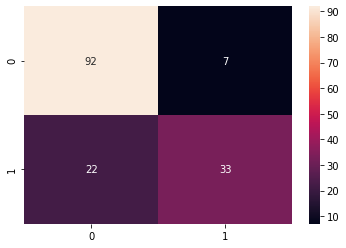

In [58]:
outcome_labels = sorted(diabetes.Outcome.unique())

sns.heatmap(
    confusion_matrix(y_test, pred_f),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels);


In [59]:
print(classification_report(y_test, pred_f))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86        99
           1       0.82      0.60      0.69        55

    accuracy                           0.81       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154



In [60]:
logit_searcher.C_

array([0.01739726])

### Plotting the CV-accuracy VS C (regularization parameter) plot to check the performance

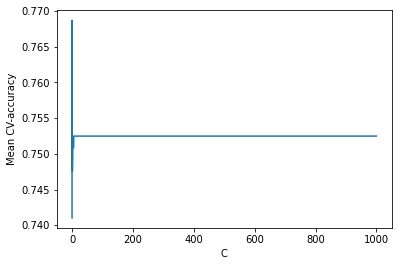

In [61]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

### Selecting the area with highest accuracy

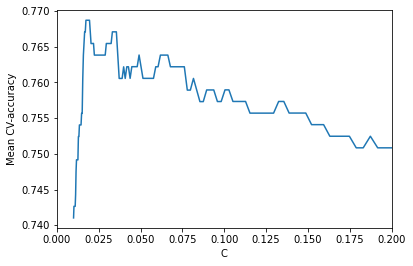

In [62]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,.2));